---

이번 코드 공유에서는  
- 전반부: 최종 제출 파일 생성을 위한 코드 <-  new 데이터 로드 방법도 공유합니다 (feat.zip 파일 불러오기)
- 후반부: 나만의 EDA
- 함수 zip

순서로 진행됩니다!  

---

*데이콘 교육을 받는 1달 반 동안 진심으로 즐겁게 참여했습니다. 감사합니다 :)

# [2022 수원대] Stage 4. 와인 품질 분류 경진대회

## 간략 설명: 데이콘 교육 +α (추가된 점)

>Stage4. 와인 품질 분류 교육에서는 Model Ensemble이 핵심이었다고 생각하는데요,  
>Model Ensemble의 결과를 얻는 방법은 Hard Voting과 Soft Voting 총 2가지였습니다.  
>이번 Stage 4.와인 품질 분류에서는 Soft Voting 방법을 모델별로 비율을 다르게 설정해보았습니다!


>EDA를 통해 결정적인 인사이트를 얻지 못한 것은 아직까지도 아쉽지만,,,  
>그래도 많은 분들께 도움이 되었으면 좋겠습니다!  
>

*함수zip은 데이콘&수원대 교육에서의 마지막 코드 공유이다보니 교육 시 다뤘던 함수들의 응용 버전이 많습니다.  


### **new 데이터셋** (type별로 "white" vs "red")
0. train[train["type"]==("white" or "red")]  
  - white_wine 데이터셋, red_wine 데이터셋으로 **분할**

1. 각 데이터셋을 column별로 **z-score**가 **3 이상** 또는 **-3 이하**인 행 **삭제**
  - white_wine과 red_wine의 feature 범위가 다른 문제
  - MinMaxScaler는 이상치가 많은 데이터에 적합하지 않다는 문제

2. **MinMaxScaler**  
3. type별 데이터셋에서 데이터 수가 적은 **데이터 늘리기**  
  - 단, 데이터를 늘린 후에도 처음과 같은 분포를 유지 
4. (new) train 데이터셋으로 **병합**

이 과정에서 1&2, 3 의 순서에 대한 고민을 많이 했는데 어떤 순서가 적합한지는 확실하지 않음  


### **feature selection**  
- train.columns[2:]  
  : train.columns[2:-1] (데이콘 교육) + type 추가  
  type은 {"white":0, "red":1} int형으로 변환하여 사용  

### **Model ensemble**
0. (Stratified) K-Fold를 통해 모델을 단독으로 사용했을 때의 성능을 확인  
GradientBoostingClassifier은 parameter에 따라 성능 차이가 심하다고 판단 -> LGBMClassifier로 교체  
1. GridSearchCV로 모델 학습
  - RandomForestClassifier - 42.5 %
  - ExtraTreesClassifier - 42.5 %
  - **LGBMClassifier** - 15 %  

2. Soft Voting을 모델별로 비율을 다르게 설정 <-> (교육에서는 동일한 비율)  

# 와인 품질 데이터

**features**  
>- index 구분자(ID)
>- **fixed acidity**(결합산) : 와인의 산도를 제어한다. 
>- **volatile acidity**(휘발산) : 와인의 향에 연관이 많다. 
>- **citric acid**(구연산) : 와인의 신선함을 유지시켜주는 역할을 하며, 산성화에 연관을 미친다. 
>- **residual sugar**(잔여 설탕) : 와인의 단맛을 올려준다. 
>- **chlorides**(염소) : 와인의 짠맛과 신맛을 좌우하는 성분이다.  
>- **free sulfur dioxide** 독립 이산화황**<황 화합물>**
>- **total sulfur dioxide** 총 이산화황**<황 화합물>**
>- **density**(밀도) : 바디의 높고 낮음을 표현하는 와인의 바디감을 의미한다. 
>- **pH**(산성도) : 와인의 신맛의 정도를 나타낸다. 
>- **sulphates** 황산염**<황 화합물>**
>- **alcohol**(알코올) : 와인에 단맛을 주며 바디감에 영향을 준다. 
>- **type**(종류) : {"white":0, "red":1}
  
**<황 화합물>** : 특정 박테리아와 효모를 죽여 와인의 보관도를 높여준다. 


**target**  
>- **quality**(품질;3~9 등급) : 결과적으로 다른 변수들을 이용하여 예측하려고 하는 변수로 와인의 품질을 나타낸다.  
  (답안 제출을 위해서 예측해야 되는 값)


※ 데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Wine+Quality



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install catboost

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 드라이브 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import
: 코드 실행에 필요하지 않은 라이브러리도 포함되어 있음

In [ ]:
# 데이터 프레임 생성을 위한 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

# 스케일러
from sklearn.preprocessing import StandardScaler # 평균과 표준편차 사용
from sklearn.preprocessing import MinMaxScaler # 최대-최소 가 1-0이 되도록
from sklearn.preprocessing import MaxAbsScaler # 최대절대값과 0이 각각 1-0이 되도록
from sklearn.preprocessing import RobustScaler # 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
import scipy.stats as stats # stats.zscore -> z-score 변환

# 분류(Classifier) 모델
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier # !pip install catboost 실행 후 사용 가능

# 모델 성능 평가
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

## 데이터 로드 및 전처리

- **unzip 파일명.zip 경로** 명령  

In [ ]:
!unzip '/content/drive/MyDrive/DACON/Stage4.와인 품질 분류 경진대회/와인품질분류.zip' # 파일명.zip이 위치한 경로 설정

Archive:  /content/drive/MyDrive/DACON/Stage4.와인 품질 분류 경진대회/와인품질분류.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


파일명이 data인 파일에 train, test, sample_submission 총 3개의 csv 파일이 생성

In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
print(f"train : {train.shape}")
print(f"test : {test.shape}")
print(f"submission : {submission.shape}")

train : (5497, 14)
test : (1000, 13)
submission : (1000, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


#### quality_barplot 함수  
: 데이터 전처리에 따른 데이터 개수 및 quality 분포 변화 시각화

In [ ]:
def quality_barplot(df:pd.DataFrame(), transformed=False):
  print(f'{set(df["type"])} 데이터 : {df.shape}')
  print(df['quality'].value_counts().sort_index())

  x = df['quality'].value_counts().sort_index().index
  y = df['quality'].value_counts().sort_index().values

  plt.figure(dpi=150)

  if not transformed:
    plt.title(f'{set(df["type"])} 와인 품질 분포 (original.ver)')
  else:
    plt.title(f'{set(df["type"])} 와인 품질 분포 (변경.ver)')

  plt.xlabel(f'{set(df["type"])} 와인 품질')
  plt.ylabel('개수')

  bar = plt.bar(x,y)

  # 숫자 넣는 부분
  max_h = 0
  for rect in bar:
      height = rect.get_height()
      plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)
      if max_h < height:
        max_h = height

  plt.ylim(0, max_h+150)
  plt.show()

{'red', 'white'} 데이터 : (5497, 14)
3      26
4     186
5    1788
6    2416
7     924
8     152
9       5
Name: quality, dtype: int64


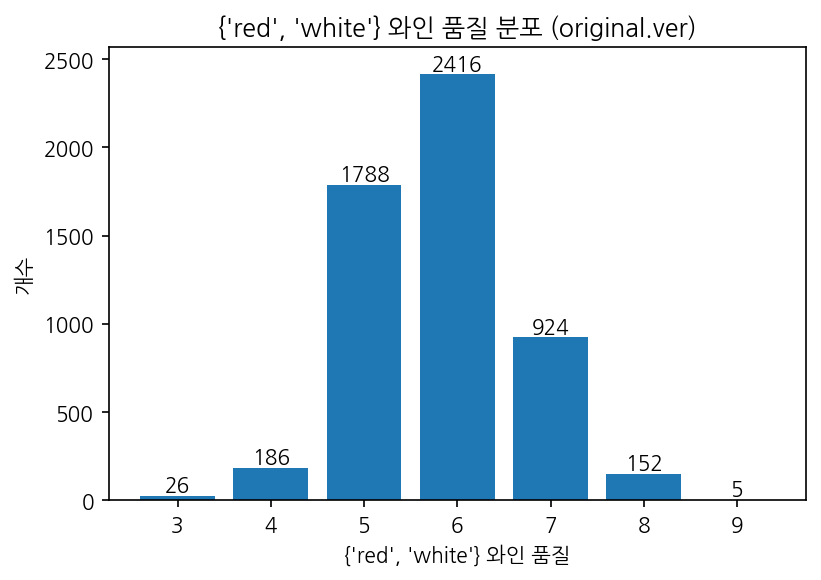

In [ ]:
quality_barplot(df=train, transformed=False)

### train 데이터셋 분할 (type별)

- **type** : {"red", "white"}

In [ ]:
white_wine = train[train['type']=="white"]
red_wine = train[train['type']=="red"]

print(f"white_wine : {white_wine.shape}")
print(f"red_wine : {red_wine.shape}")

white_wine : (4159, 14)
red_wine : (1338, 14)


{'white'} 데이터 : (4159, 14)
3      17
4     145
5    1217
6    1881
7     755
8     139
9       5
Name: quality, dtype: int64


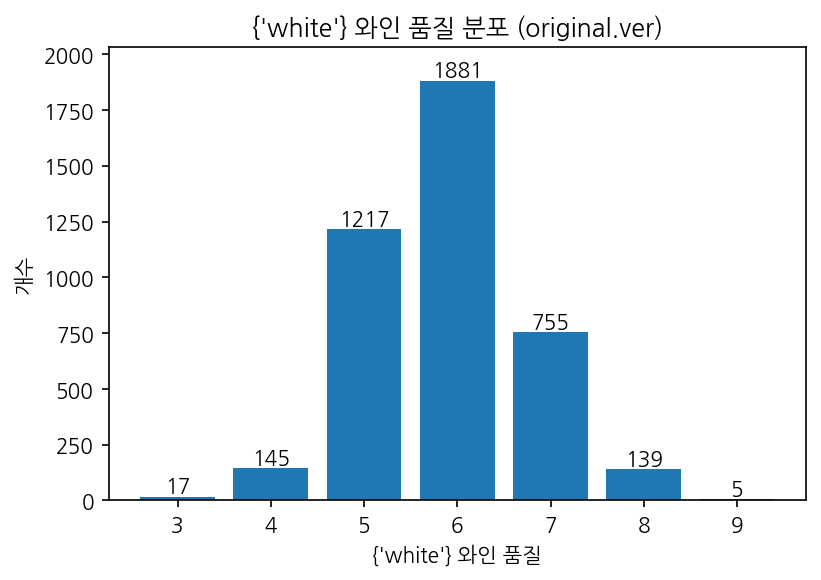

{'red'} 데이터 : (1338, 14)
3      9
4     41
5    571
6    535
7    169
8     13
Name: quality, dtype: int64


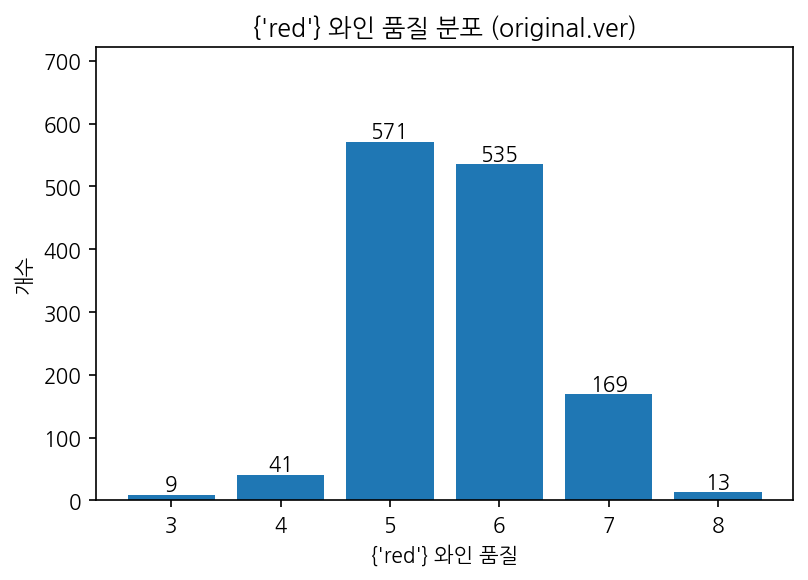

In [ ]:
quality_barplot(df=white_wine, transformed=False)
quality_barplot(df=red_wine, transformed=False)

### 데이터 전처리 (type별 변경)

- z-score 3이상 -3이하인 **데이터 제거**
- Scaler 
- **quality** : {3, 4, 5, 6, 7, 8, 9} 중 데이터 개수가 적은 데이터 늘리기
  - white_wine - 3,4,8,9
  - red_wine - 3,4,6,7,8(2회, 2x2로 4배)


- features 와 target(=quality) 지정하기

#### white_wine

{'white'} 데이터 : (4159, 14)
3      17
4     145
5    1217
6    1881
7     755
8     139
9       5
Name: quality, dtype: int64


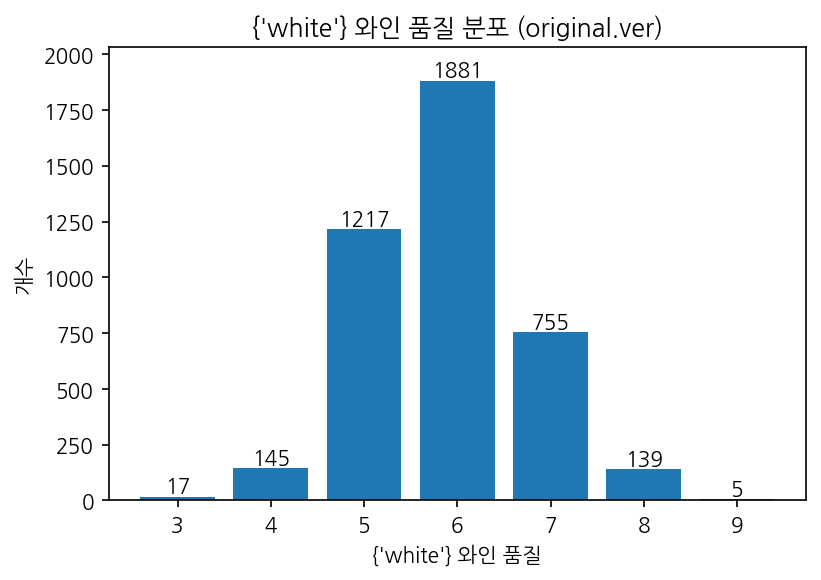

In [ ]:
quality_barplot(df=white_wine, transformed=False)

- z-score: 이상치에 민감하지 않지만, 규모가 다름
- MinMaxScaler: 0~1사이의 값으로 규모가 동일하지만, 이상치에 민감하다

In [ ]:
print("z-score 적용 전 :", white_wine.shape)

white_zscore = np.abs(stats.zscore(white_wine[white_wine.columns[2:-1]]))
white_wine = white_wine.loc[(white_zscore<3).all(axis=1)]
print("z-score 3이상 -3이하 제거 :", white_wine.shape)

white_wine.describe()

z-score 적용 전 : (4159, 14)
z-score 3이상 -3이하 제거 : (3814, 14)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000,3814.000000
mean,2759.934452,5.912952,6.844717,0.270620,0.326683,6.401036,0.043087,34.587965,137.068956,0.993948,3.188526,0.485333,10.552024
std,1590.516470,0.867440,0.790174,0.085134,0.100663,4.939238,0.011702,15.259386,41.289529,0.002910,0.143342,0.105371,1.224818
min,2.000000,3.000000,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,19.000000,0.987110,2.790000,0.220000,8.400000
25%,1392.250000,5.000000,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,107.000000,0.991650,3.090000,0.410000,9.500000
50%,2743.500000,6.000000,6.800000,0.260000,0.320000,5.300000,0.042000,34.000000,133.000000,0.993650,3.180000,0.470000,10.400000
75%,4154.750000,6.000000,7.300000,0.320000,0.380000,9.887500,0.050000,45.000000,166.000000,0.996007,3.280000,0.540000,11.400000
max,5496.000000,9.000000,9.300000,0.570000,0.690000,20.800000,0.110000,86.000000,259.000000,1.001960,3.640000,0.820000,14.200000


In [ ]:
print(f"train의 scaling columns : \n{train.columns[2:-1]}") 
print(f"test의 scaling columns : \n{test.columns[1:-1]}")

train의 scaling columns : 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
test의 scaling columns : 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

white_scaler = MinMaxScaler()

white_wine[white_wine.columns[2:-1]] = white_scaler.fit_transform(white_wine[white_wine.columns[2:-1]])
test.loc[test['type']=="white", test.columns[1:-1]] = white_scaler.transform(test.loc[test['type']=="white", test.columns[1:-1]])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


{'white'} 데이터 : (3814, 14)
3       8
4     112
5    1087
6    1743
7     730
8     129
9       5
Name: quality, dtype: int64


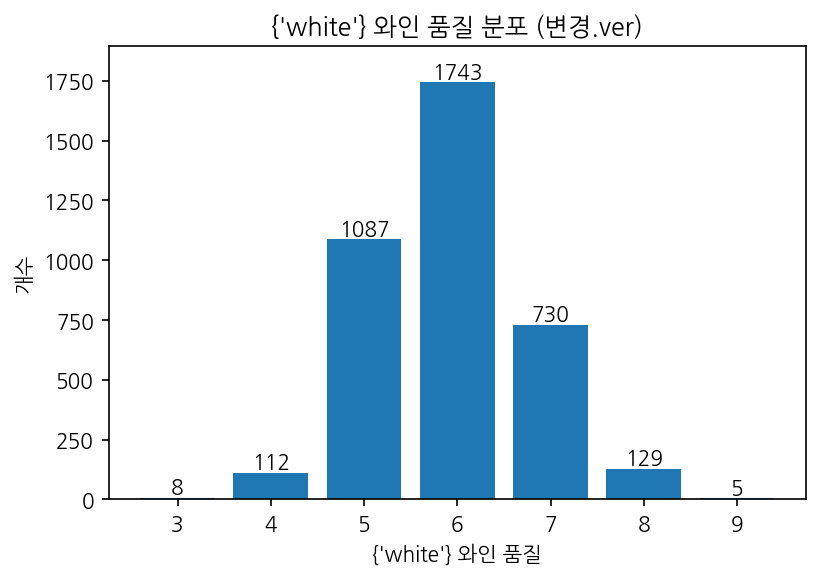

In [ ]:
quality_barplot(df=white_wine, transformed=True)

In [ ]:
white_wine = white_wine.append(white_wine[white_wine['quality'].isin([3,4,8,9])])

{'white'} 데이터 : (4068, 14)
3      16
4     224
5    1087
6    1743
7     730
8     258
9      10
Name: quality, dtype: int64


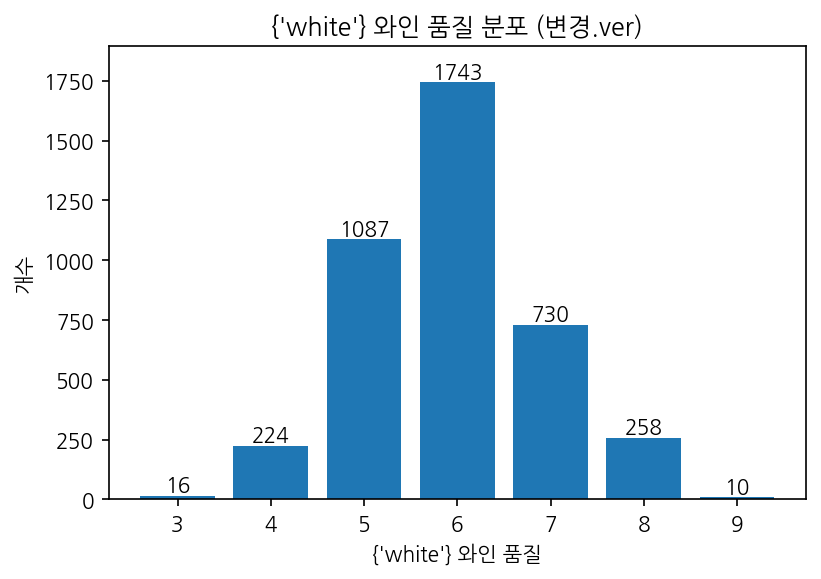

In [ ]:
quality_barplot(df=white_wine, transformed=True)

#### red_wine

{'red'} 데이터 : (1338, 14)
3      9
4     41
5    571
6    535
7    169
8     13
Name: quality, dtype: int64


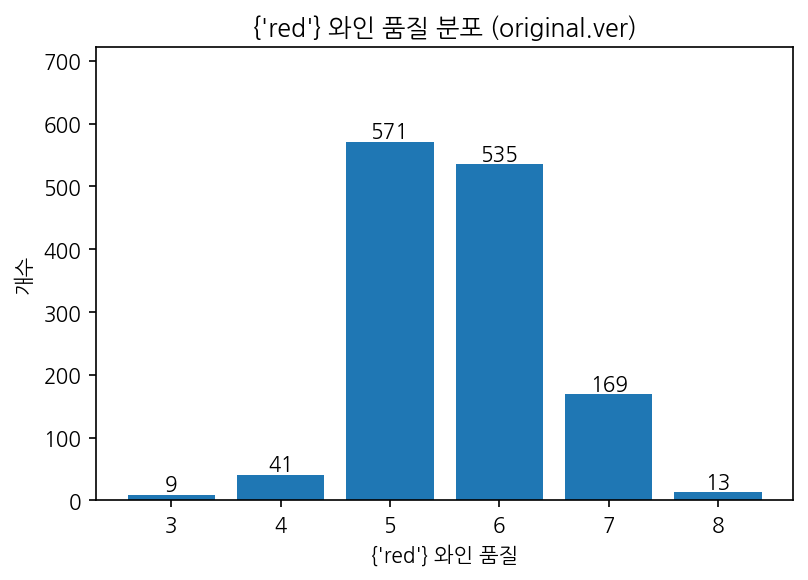

In [ ]:
quality_barplot(df=red_wine, transformed=False)

In [ ]:
print("z-score 적용 전 :", red_wine.shape)

red_zscore = np.abs(stats.zscore(red_wine[red_wine.columns[2:-1]]))
red_wine = red_wine.loc[(red_zscore<3).all(axis=1)]
print("z-score 3이상 -3이하 제거 :", red_wine.shape)

red_wine.describe()

z-score 적용 전 : (1338, 14)
z-score 3이상 -3이하 제거 : (1213, 14)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2701.604287,5.655400,8.283924,0.520495,0.264196,2.392622,0.081418,15.053586,43.182193,0.996692,3.318508,0.642704,10.435339
std,1581.892068,0.797043,1.620276,0.167823,0.189066,0.871688,0.021515,9.225070,28.605296,0.001718,0.138977,0.132393,1.022228
min,1.000000,3.000000,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.390000,8.400000
25%,1305.000000,5.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000
50%,2692.000000,6.000000,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,35.000000,0.996690,3.320000,0.620000,10.200000
75%,4061.000000,6.000000,9.200000,0.630000,0.420000,2.600000,0.088000,20.000000,58.000000,0.997800,3.410000,0.710000,11.100000
max,5490.000000,8.000000,13.400000,1.040000,0.750000,6.600000,0.226000,46.000000,141.000000,1.002200,3.750000,1.170000,13.600000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

red_scaler = MinMaxScaler()

red_wine[red_wine.columns[2:-1]] = red_scaler.fit_transform(red_wine[red_wine.columns[2:-1]])
test.loc[test['type']=="red", test.columns[1:-1]] = red_scaler.transform(test.loc[test['type']=="red", test.columns[1:-1]])

{'red'} 데이터 : (1213, 14)
3      6
4     35
5    513
6    488
7    159
8     12
Name: quality, dtype: int64


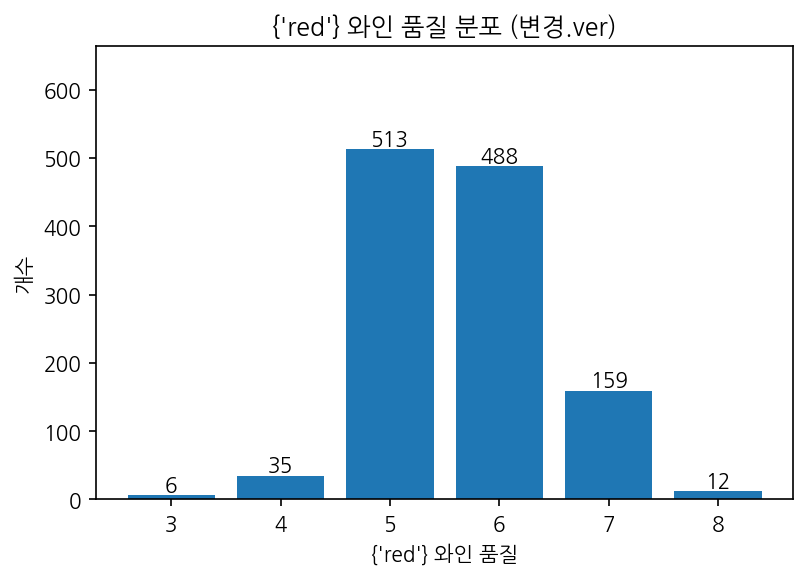

In [ ]:
quality_barplot(df=red_wine, transformed=True)

In [ ]:
red_wine = red_wine.append(red_wine[red_wine['quality'].isin([3,6,7,8])])
red_wine = red_wine.append(red_wine[red_wine['quality'].isin([4,8])])

{'red'} 데이터 : (1937, 14)
3     12
4     70
5    513
6    976
7    318
8     48
Name: quality, dtype: int64


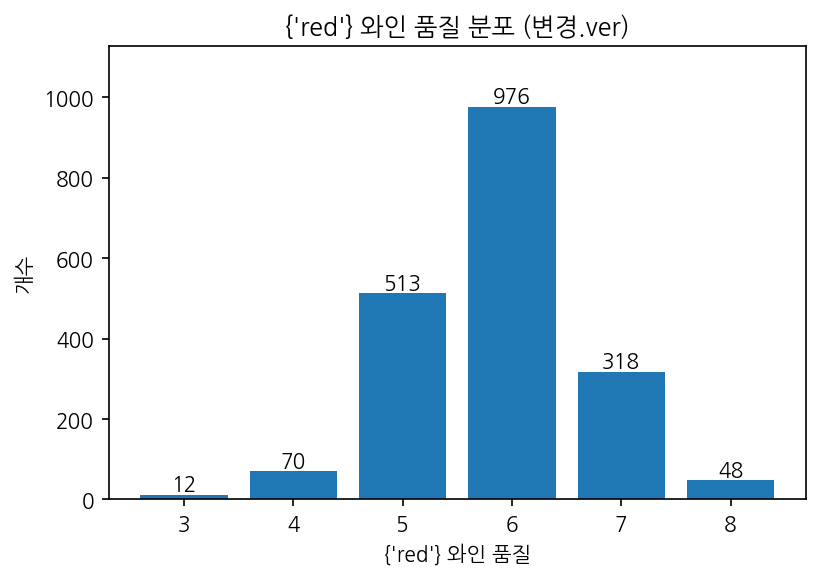

In [ ]:
quality_barplot(df=red_wine, transformed=True)

### new train 데이터셋 (병합)
train = white_wine + red_wine

train 데이터 : (6005, 14)

{0, 1} 데이터 : (6005, 14)
3      28
4     294
5    1600
6    2719
7    1048
8     306
9      10
Name: quality, dtype: int64


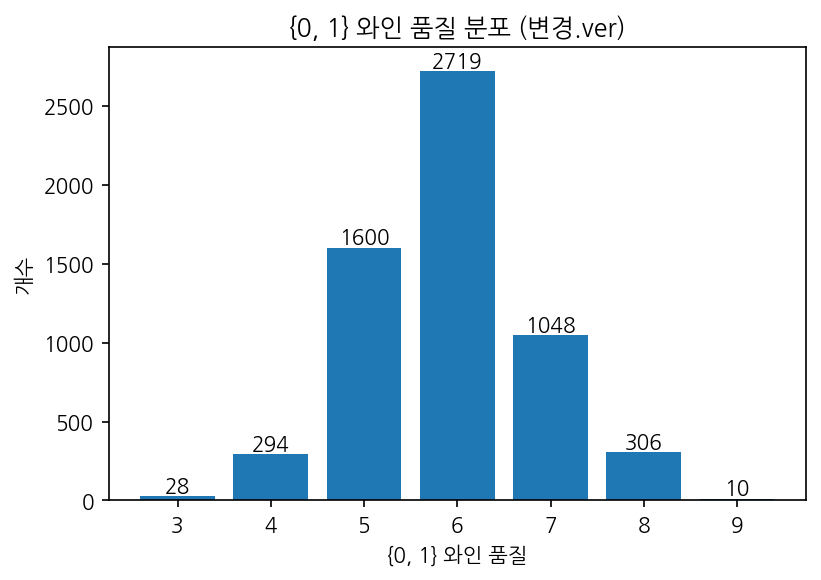

In [ ]:
train = pd.concat([white_wine, red_wine])
train['type'] = train['type'].map({"white":0, "red":1}).astype(int)
test['type'] = test['type'].map({"white":0, "red":1}).astype(int)

print(f"train 데이터 : {train.shape}")
print()
quality_barplot(df=train, transformed=True)

### {함수 - 모델 성능 검증 시각화}

- 정확도(Accuracy) 함수

In [ ]:
def ACC(true, pred):
  score = np.mean(true == pred)
  return score

- 모델 검증 시각화 함수

In [ ]:
def make_plot():
  acc = ACC(y_valid, y_pred)

  validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})

  validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
  validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index().values
  validation_count = validation_count.fillna(0)

  x = validation_count.index
  y_valid_count = validation_count['y_valid']
  y_pred_count = validation_count['y_pred']

  width = 0.35

  plt.figure(dpi=150)

  plt.title('ACC : ' + str(acc)[:6])
  plt.xlabel('quality')
  plt.ylabel('count')

  p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
  p2 = plt.bar([idx+width/2 for idx in x], y_pred_count, width, label='pred')

  plt.legend()
  plt.show()

- 모델 성능 평가(classification_report)

In [ ]:
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix, classification_report

def confusion_matrix_print():
  val_pred = model.predict(X_valid) # model prediction
  precision = precision_score(y_valid, val_pred, average= "macro")
  recall = recall_score(y_valid, val_pred,average= "macro")
  val_score = f1_score(y_valid, val_pred, average='macro')

  print(f'정밀도: [{precision:.4f}]')
  print(f'재현율: [{recall:.4f}]')
  print(f'F1 Score : [{val_score: .4f}]')
  
  print(classification_report(y_valid, val_pred))

  return val_pred

## 모델 선택: StratifiedKFold

다른 분류 모델이 궁금하다면 **Import**에서 **분류 모델** 부분 참고

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [ ]:
features = train.columns[2:]
print(features)
X = train[features]
y = train['quality']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')


#### RandomForestClassifier

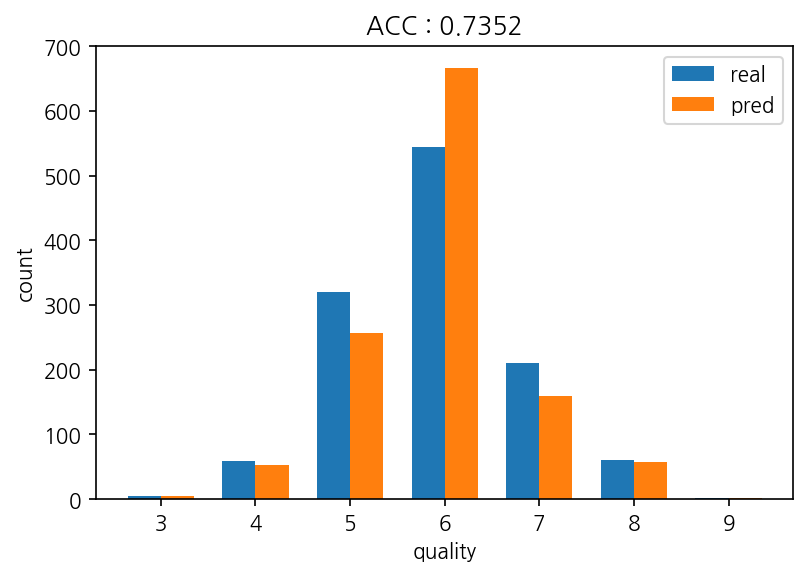

정밀도: [0.8582]
재현율: [0.8119]
F1 Score : [ 0.8305]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       0.87      0.76      0.81        59
           5       0.77      0.62      0.68       320
           6       0.69      0.84      0.76       544
           7       0.76      0.58      0.65       210
           8       0.93      0.89      0.91        61
           9       1.00      1.00      1.00         2

    accuracy                           0.74      1201
   macro avg       0.86      0.81      0.83      1201
weighted avg       0.74      0.74      0.73      1201



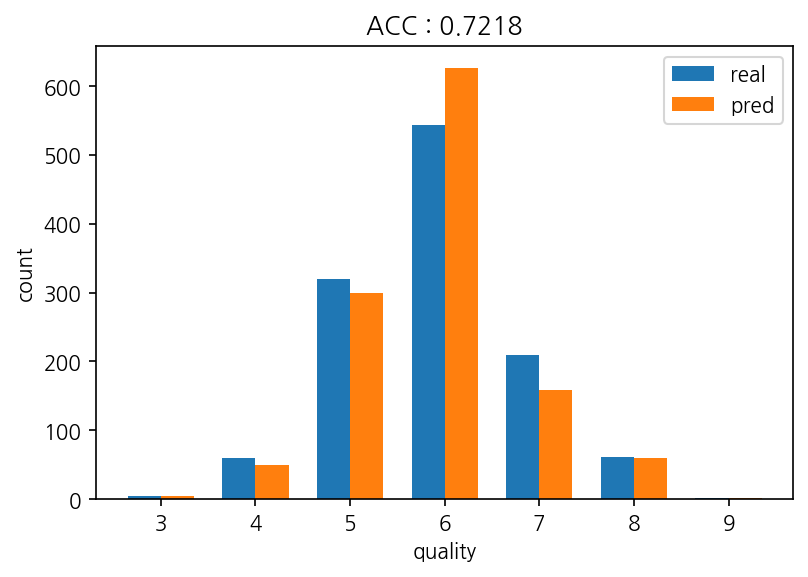

정밀도: [0.8591]
재현율: [0.8157]
F1 Score : [ 0.8338]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       0.94      0.78      0.85        59
           5       0.66      0.62      0.64       320
           6       0.69      0.80      0.74       544
           7       0.78      0.59      0.67       210
           8       0.93      0.92      0.93        61
           9       1.00      1.00      1.00         2

    accuracy                           0.72      1201
   macro avg       0.86      0.82      0.83      1201
weighted avg       0.73      0.72      0.72      1201



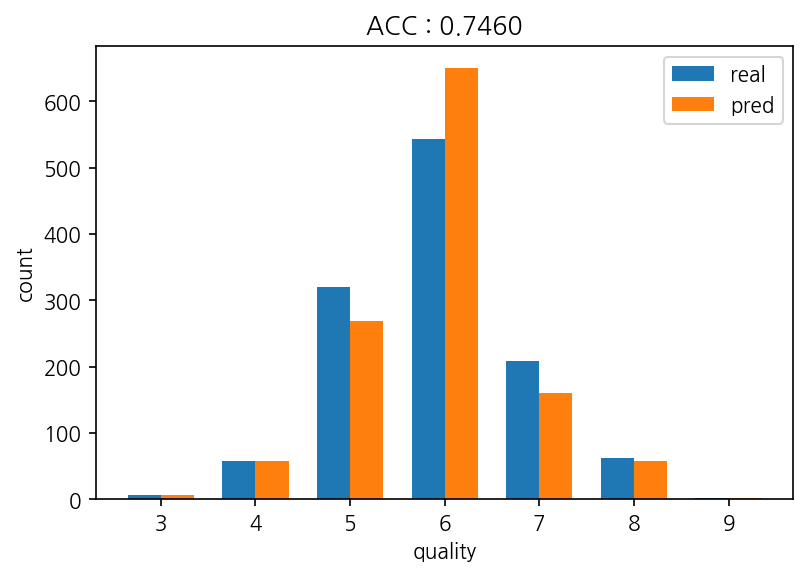

정밀도: [0.7254]
재현율: [0.6900]
F1 Score : [ 0.7041]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.89      0.88      0.89        58
           5       0.76      0.64      0.69       320
           6       0.70      0.83      0.76       544
           7       0.79      0.61      0.69       209
           8       0.93      0.87      0.90        62
           9       0.00      0.00      0.00         2

    accuracy                           0.75      1201
   macro avg       0.73      0.69      0.70      1201
weighted avg       0.75      0.75      0.74      1201



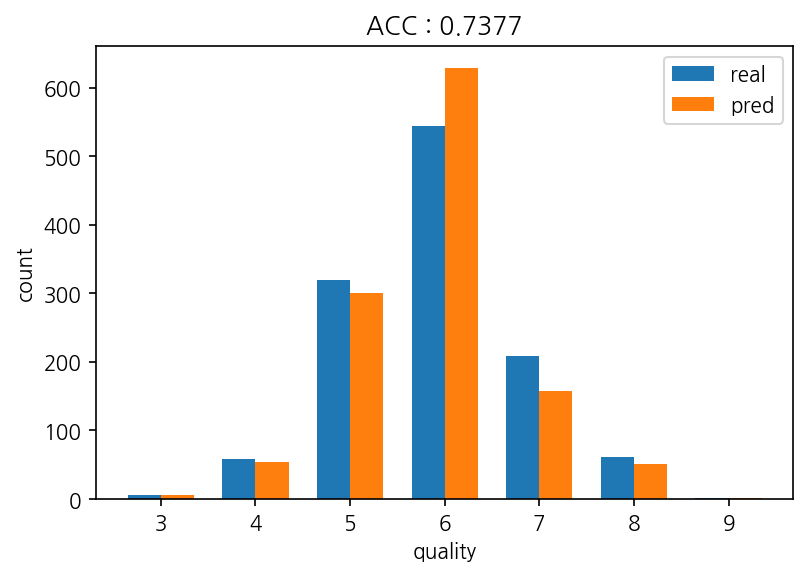

정밀도: [0.8610]
재현율: [0.8111]
F1 Score : [ 0.8323]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.89      0.81      0.85        59
           5       0.69      0.65      0.67       320
           6       0.72      0.83      0.77       544
           7       0.77      0.58      0.66       209
           8       0.96      0.80      0.88        61
           9       1.00      1.00      1.00         2

    accuracy                           0.74      1201
   macro avg       0.86      0.81      0.83      1201
weighted avg       0.74      0.74      0.74      1201



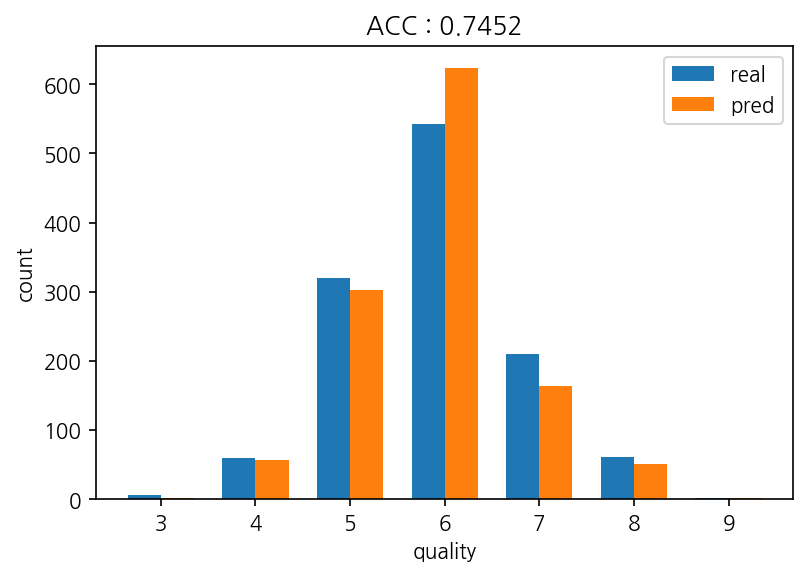

정밀도: [0.8696]
재현율: [0.7319]
F1 Score : [ 0.7737]
              precision    recall  f1-score   support

           3       1.00      0.33      0.50         6
           4       0.91      0.88      0.90        59
           5       0.72      0.68      0.70       320
           6       0.71      0.82      0.76       543
           7       0.78      0.60      0.68       210
           8       0.96      0.80      0.88        61
           9       1.00      1.00      1.00         2

    accuracy                           0.75      1201
   macro avg       0.87      0.73      0.77      1201
weighted avg       0.75      0.75      0.74      1201



In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)

models = []
for train_idx, valid_idx in kfold.split(X, y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  # display(X_valid)
  # model = ExtraTreesClassifier(random_state=0) # Gooooood!!
  # model = RandomFores/tClassifier(random_state=0) # Good
  model = LGBMClassifier(random_state=0) # Good

  model.fit(X_train, y_train)

  y_pred = model.predict(X_valid)
  models.append(model)

  make_plot()
  confusion_matrix_print()

#### ExtraTreesClassifier

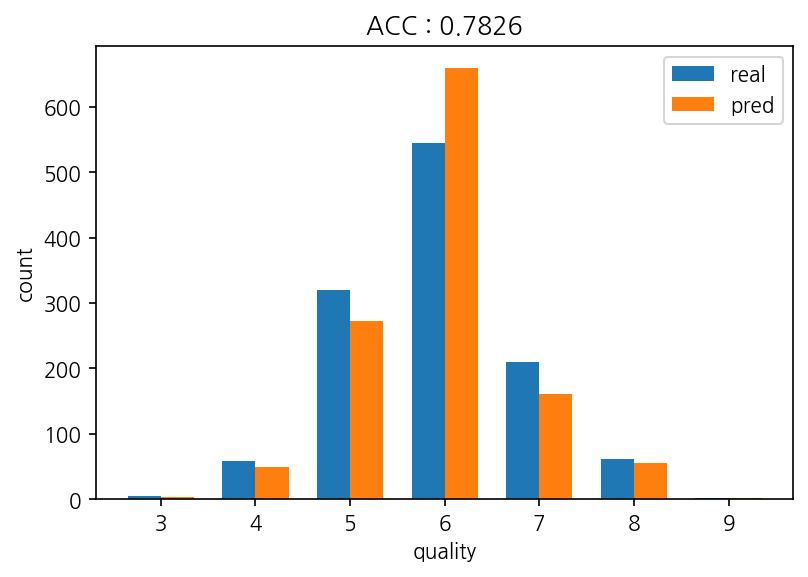

정밀도: [0.9112]
재현율: [0.7915]
F1 Score : [ 0.8390]
              precision    recall  f1-score   support

           3       1.00      0.60      0.75         5
           4       1.00      0.83      0.91        59
           5       0.81      0.69      0.74       320
           6       0.72      0.87      0.79       544
           7       0.85      0.65      0.74       210
           8       1.00      0.90      0.95        61
           9       1.00      1.00      1.00         2

    accuracy                           0.78      1201
   macro avg       0.91      0.79      0.84      1201
weighted avg       0.80      0.78      0.78      1201



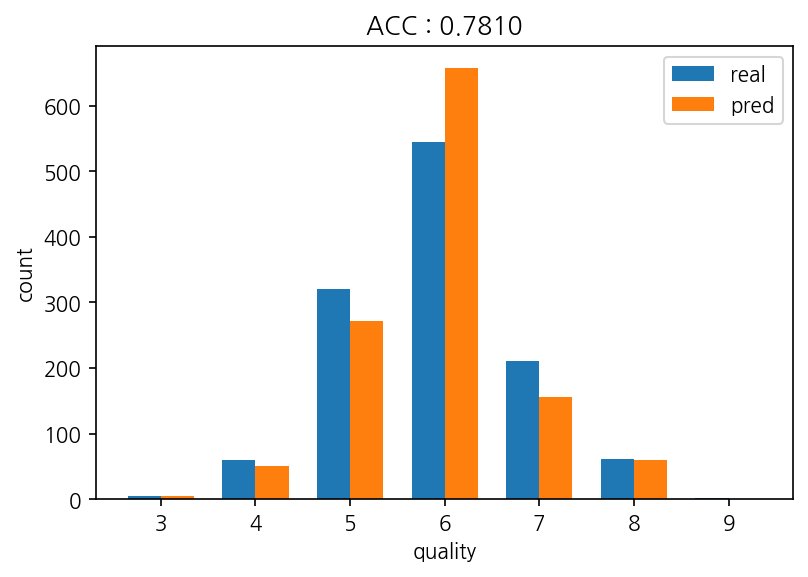

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

정밀도: [0.7535]
재현율: [0.7067]
F1 Score : [ 0.7254]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       0.92      0.80      0.85        59
           5       0.79      0.67      0.72       320
           6       0.73      0.88      0.80       544
           7       0.85      0.63      0.73       210
           8       0.98      0.97      0.98        61
           9       0.00      0.00      0.00         2

    accuracy                           0.78      1201
   macro avg       0.75      0.71      0.73      1201
weighted avg       0.79      0.78      0.78      1201



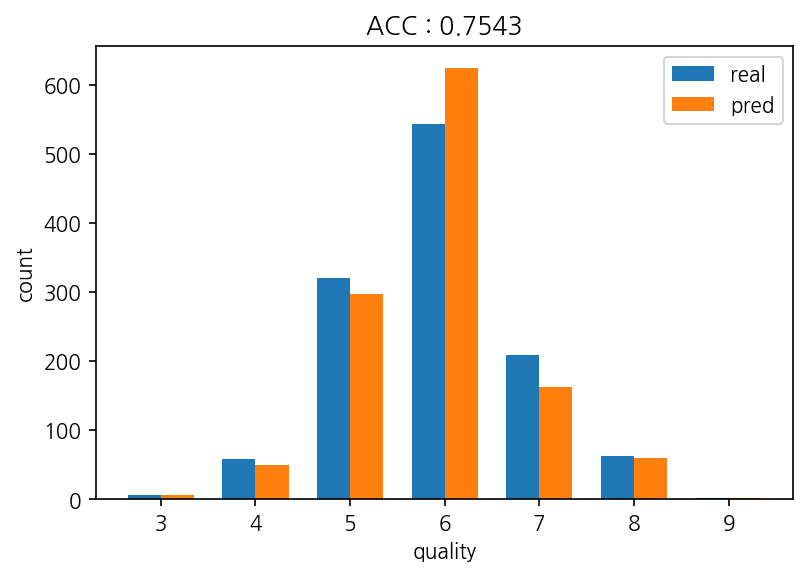

정밀도: [0.8744]
재현율: [0.8316]
F1 Score : [ 0.8500]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.96      0.83      0.89        58
           5       0.75      0.70      0.73       320
           6       0.71      0.82      0.76       544
           7       0.78      0.60      0.68       209
           8       0.92      0.87      0.89        62
           9       1.00      1.00      1.00         2

    accuracy                           0.75      1201
   macro avg       0.87      0.83      0.85      1201
weighted avg       0.76      0.75      0.75      1201



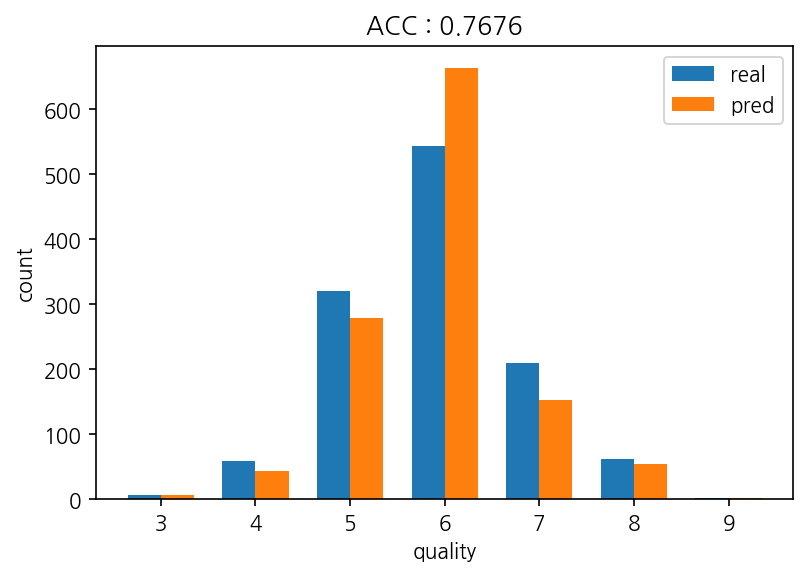

정밀도: [0.8989]
재현율: [0.8199]
F1 Score : [ 0.8517]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      0.73      0.84        59
           5       0.77      0.68      0.72       320
           6       0.71      0.87      0.78       544
           7       0.86      0.63      0.73       209
           8       0.94      0.84      0.89        61
           9       1.00      1.00      1.00         2

    accuracy                           0.77      1201
   macro avg       0.90      0.82      0.85      1201
weighted avg       0.78      0.77      0.77      1201



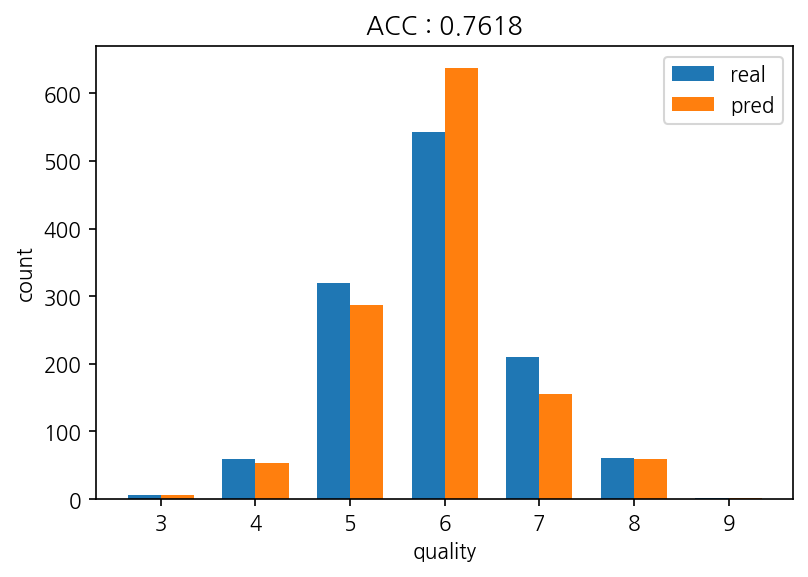

정밀도: [0.8738]
재현율: [0.8357]
F1 Score : [ 0.8513]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.94      0.86      0.90        59
           5       0.78      0.70      0.74       320
           6       0.72      0.85      0.78       543
           7       0.77      0.57      0.66       210
           8       0.90      0.87      0.88        61
           9       1.00      1.00      1.00         2

    accuracy                           0.76      1201
   macro avg       0.87      0.84      0.85      1201
weighted avg       0.77      0.76      0.76      1201



In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)

models = []
for train_idx, valid_idx in kfold.split(X, y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  # display(X_valid)
  model = ExtraTreesClassifier(random_state=0) # Gooooood!!
  # model = RandomForestClassifier(random_state=0) # Good/

  model.fit(X_train, y_train)

  y_pred = model.predict(X_valid)
  models.append(model)

  make_plot()
  confusion_matrix_print()

#### LGBMClassifier

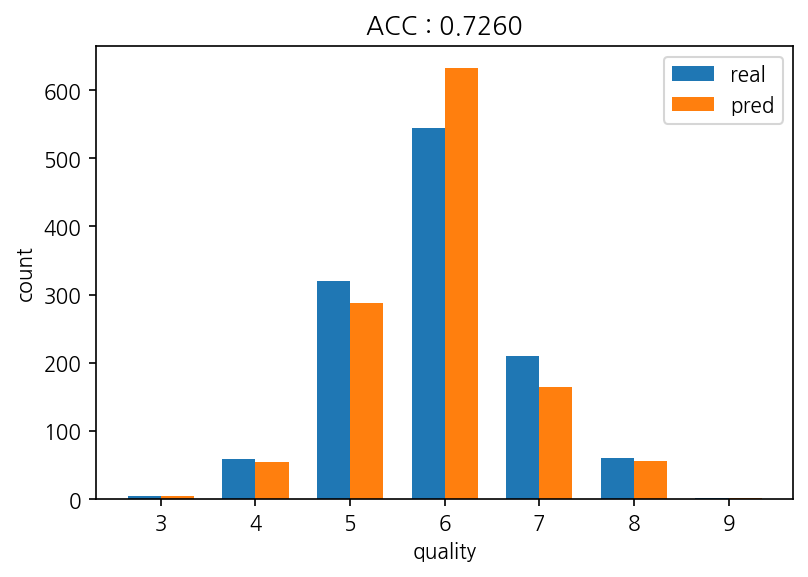

정밀도: [0.8602]
재현율: [0.8200]
F1 Score : [ 0.8373]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       0.96      0.88      0.92        59
           5       0.71      0.64      0.67       320
           6       0.69      0.80      0.74       544
           7       0.75      0.59      0.66       210
           8       0.91      0.84      0.87        61
           9       1.00      1.00      1.00         2

    accuracy                           0.73      1201
   macro avg       0.86      0.82      0.84      1201
weighted avg       0.73      0.73      0.72      1201



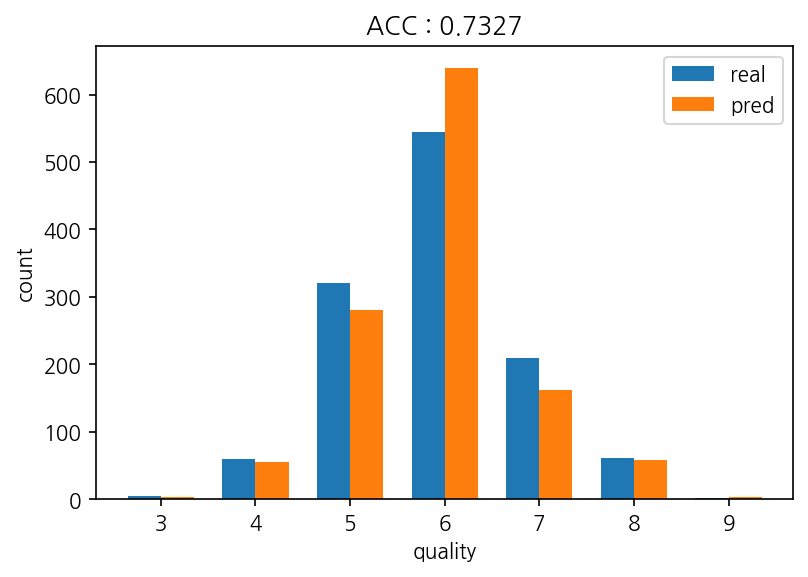

정밀도: [0.8069]
재현율: [0.7625]
F1 Score : [ 0.7698]
              precision    recall  f1-score   support

           3       1.00      0.60      0.75         5
           4       0.89      0.83      0.86        59
           5       0.71      0.62      0.66       320
           6       0.70      0.83      0.76       544
           7       0.77      0.59      0.67       210
           8       0.91      0.87      0.89        61
           9       0.67      1.00      0.80         2

    accuracy                           0.73      1201
   macro avg       0.81      0.76      0.77      1201
weighted avg       0.74      0.73      0.73      1201



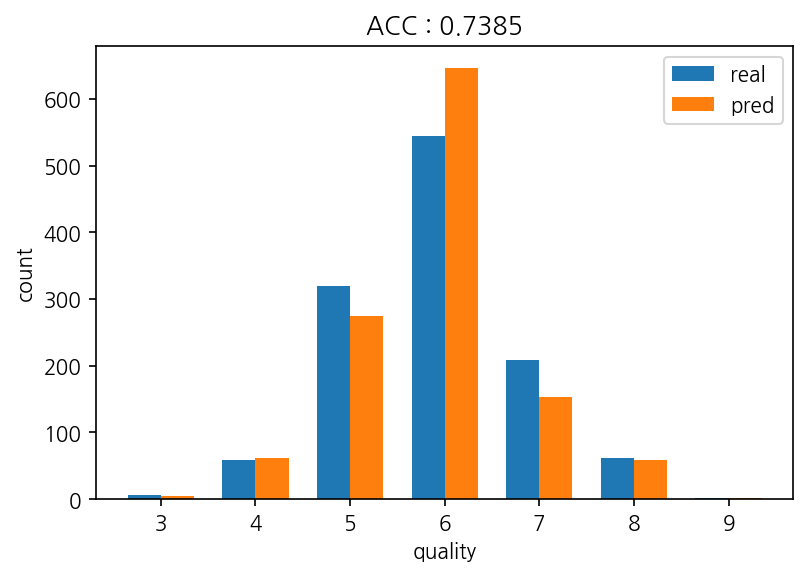

정밀도: [0.8544]
재현율: [0.7822]
F1 Score : [ 0.8098]
              precision    recall  f1-score   support

           3       1.00      0.67      0.80         6
           4       0.87      0.91      0.89        58
           5       0.77      0.66      0.71       320
           6       0.70      0.83      0.76       544
           7       0.73      0.54      0.62       209
           8       0.92      0.87      0.89        62
           9       1.00      1.00      1.00         2

    accuracy                           0.74      1201
   macro avg       0.85      0.78      0.81      1201
weighted avg       0.74      0.74      0.73      1201



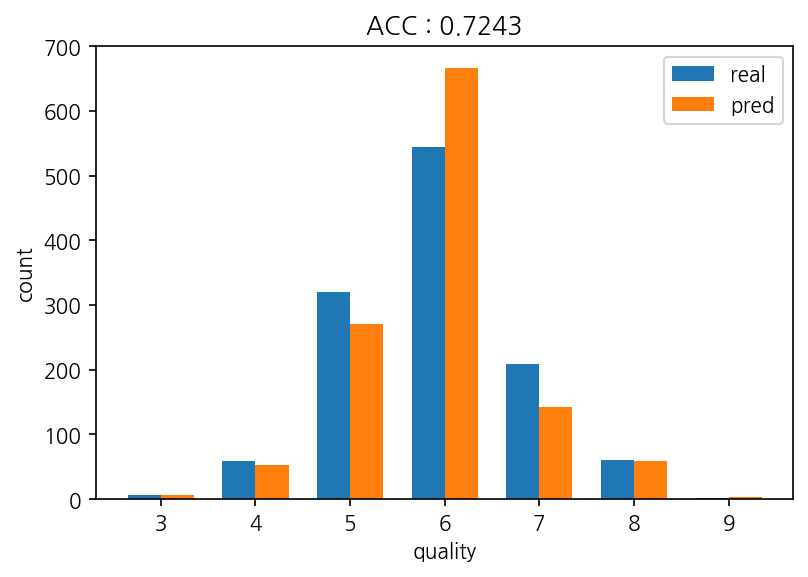

정밀도: [0.7966]
재현율: [0.7986]
F1 Score : [ 0.7874]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.81      0.73      0.77        59
           5       0.73      0.62      0.67       320
           6       0.68      0.84      0.75       544
           7       0.78      0.54      0.64       209
           8       0.90      0.87      0.88        61
           9       0.67      1.00      0.80         2

    accuracy                           0.72      1201
   macro avg       0.80      0.80      0.79      1201
weighted avg       0.73      0.72      0.72      1201



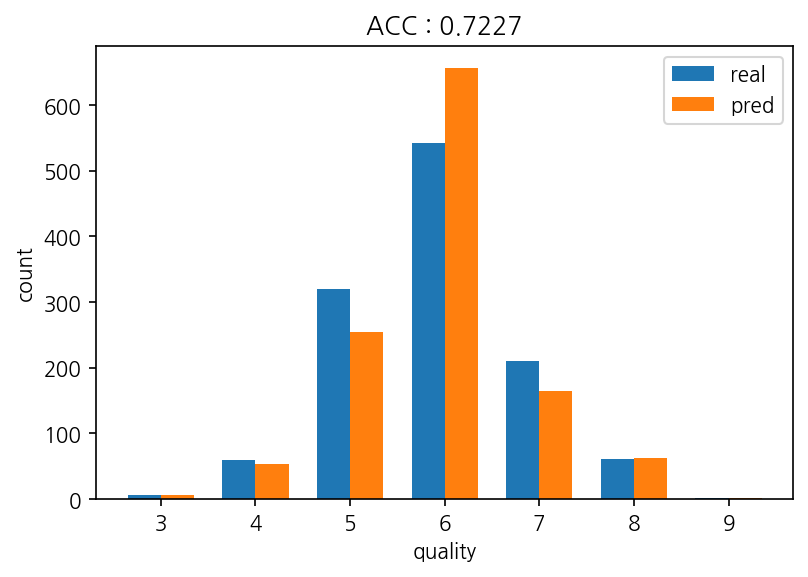

정밀도: [0.8467]
재현율: [0.8161]
F1 Score : [ 0.8275]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.85      0.78      0.81        59
           5       0.71      0.57      0.63       320
           6       0.68      0.83      0.75       543
           7       0.77      0.60      0.68       210
           8       0.90      0.93      0.92        61
           9       1.00      1.00      1.00         2

    accuracy                           0.72      1201
   macro avg       0.85      0.82      0.83      1201
weighted avg       0.73      0.72      0.72      1201



In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)

models = []
for train_idx, valid_idx in kfold.split(X, y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  # display(X_valid)
  model = LGBMClassifier(random_state=0) # Good

  model.fit(X_train, y_train)

  y_pred = model.predict(X_valid)
  models.append(model)

  make_plot()
  confusion_matrix_print()

## 모델 앙상블

### GridSearchCV로 모델 학습

In [ ]:
features = train.columns[2:]
print(features)
X = train[features]
y = train['quality']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [ ]:
models = []

rfc = RandomForestClassifier()

models.append(rfc)

etc = ExtraTreesClassifier()

models.append(etc)

lgbm = LGBMClassifier()

models.append(lgbm)


In [ ]:
best_models = {}
params = [{"random_state":[0,42]},
          {"random_state":[0,42]},
          {"random_state":[0,42]}]

for i,model in enumerate(models):
  model = GridSearchCV(model, param_grid=params[i], cv=5, return_train_score=True, verbose=2)

  model.fit(X,y)

  best_models[i] = model.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................random_state=0; total time=   1.1s
[CV] END .....................................random_state=0; total time=   1.1s
[CV] END .....................................random_state=0; total time=   1.1s
[CV] END .....................................random_state=0; total time=   1.8s
[CV] END .....................................random_state=0; total time=   1.1s
[CV] END ....................................random_state=42; total time=   1.1s
[CV] END ....................................random_state=42; total time=   1.1s
[CV] END ....................................random_state=42; total time=   1.1s
[CV] END ....................................random_state=42; total time=   1.1s
[CV] END ....................................random_state=42; total time=   1.1s
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................random_state=0; total ti

In [ ]:
best_models

{0: RandomForestClassifier(random_state=42),
 1: ExtraTreesClassifier(random_state=42),
 2: LGBMClassifier(random_state=0)}

In [ ]:
"""
{0: RandomForestClassifier(random_state=42),
 1: ExtraTreesClassifier(random_state=42),
 2: LGBMClassifier(random_state=0)}
"""

'\n{0: RandomForestClassifier(random_state=42),\n 1: ExtraTreesClassifier(random_state=42),\n 2: LGBMClassifier(random_state=0)}\n'

### 하드보팅

In [ ]:
pred0 = best_models[0].predict(test[features])
pred1 = best_models[1].predict(test[features])
pred2 = best_models[2].predict(test[features])

pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1,'pred2':pred2})
pred['pred'] = pred.mode(axis=1)[0].astype(int)
pred

,pred0,pred1,pred2,pred
0,5,6,5,5
1,6,6,5,6
2,6,6,6,6
3,5,5,6,5
4,6,6,6,6
...,...,...,...,...
995,6,6,5,6
996,6,6,6,6
997,5,5,5,5
998,6,6,6,6


In [ ]:
pred['pred'].value_counts().sort_index()

4      5
5    363
6    492
7    128
8     12
Name: pred, dtype: int64

In [ ]:
print(pred['pred0'].value_counts().sort_index())
print(pred['pred1'].value_counts().sort_index())
print(pred['pred2'].value_counts().sort_index())

4      6
5    350
6    495
7    137
8     12
Name: pred0, dtype: int64
4      5
5    380
6    471
7    134
8     10
Name: pred1, dtype: int64
4      9
5    347
6    501
7    130
8     13
Name: pred2, dtype: int64


In [ ]:
# submission['quality'] = pred['pred']
# submission.to_csv('GSCV_mode_redwhite0805_final.csv', index=False)

### 소프트보팅

In [ ]:
pred_prob0 = best_models[0].predict_proba(test[features])
pred_prob1 = best_models[1].predict_proba(test[features])
pred_prob2 = best_models[2].predict_proba(test[features])

pred_prob = pd.DataFrame((pred_prob0+pred_prob1+pred_prob2)/3)
pred_prob['quality'] = pd.DataFrame(np.argmax(np.array(pred_prob), axis=1))
pred_prob['quality'] = pred_prob['quality'] + 3
pred_prob

,0,1,2,3,4,5,6,quality
0,0.020013,0.099667,0.430542,0.326600,0.089038,0.034135,0.000005,5
1,0.040011,0.079830,0.424708,0.429708,0.025611,0.000119,0.000012,6
2,0.000010,0.019020,0.393107,0.548977,0.035266,0.003616,0.000004,6
3,0.000009,0.018095,0.693631,0.250215,0.030998,0.003715,0.003336,5
4,0.000010,0.027288,0.097771,0.502656,0.347471,0.021467,0.003338,6
...,...,...,...,...,...,...,...,...
995,0.000011,0.000954,0.202675,0.793913,0.002322,0.000123,0.000003,6
996,0.000009,0.128352,0.271717,0.510287,0.079422,0.010209,0.000003,6
997,0.006701,0.051065,0.590807,0.336386,0.014886,0.000152,0.000004,5
998,0.000009,0.029322,0.117349,0.797530,0.044742,0.011044,0.000003,6


In [ ]:
pred_prob['quality'].value_counts().sort_index()

4      5
5    355
6    504
7    124
8     12
Name: quality, dtype: int64

In [ ]:
# submission['quality'] = pred_prob['quality']
# submission.to_csv('GSCV_proba_redwhite0805_final.csv', index=False)

### new소프트보팅 <== 최종 제출 파일
: 모델별 반영 비율 상이
  - RandomForestClassifier - 42.5 %
  - ExtraTreesClassifier - 42.5 %
  - LGBMClassifier - 15 %  

In [ ]:
new_pred_prob = pd.DataFrame(pred_prob0 * 0.425 + pred_prob1 * 0.425 +pred_prob2 * 0.15)
new_pred_prob['qual'] = pd.DataFrame(np.argmax(np.array(new_pred_prob), axis=1))
new_pred_prob['qual'] = new_pred_prob['qual'] + 3
new_pred_prob['qual'].value_counts().sort_index()

4      5
5    362
6    494
7    128
8     11
Name: qual, dtype: int64

In [ ]:
submission['quality'] = new_pred_prob['qual']
submission.to_csv('GSCV_new_proba_redwhite0805_final.csv', index=False)

### mode vs proba 결과 비교

In [ ]:
ACC(pred['pred'], pred_prob['quality'])

0.961

In [ ]:
ACC(pred['pred'], new_pred_prob['qual'])

0.975

In [ ]:
ACC(pred_prob['quality'], new_pred_prob['qual'])

0.97

# EDA

### 요약

type이 다르면 {"white", "red"} column의 분포와 

## qual_label 생성

quality 에 따라 new label 생성

- 0 (bad) - quality 3,4
- 1 (soso) - quality 5,6
- 2 (good) - quality 7,8,9

type_and_qual_barplot 함수의 시각화를 통해  
white_wine, red_wine 데이터셋을 생성하게 됨

In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/와인/train.csv')
train = pd.read_csv('./data/train.csv') # unzip 명령어로 데이터 로드 시 data 파일에 ( train | test | sample_submission ) 파일 있음!

train['qual_label'] = train['quality'].map({3:0, 4:0, 5:1, 6:1, 7:2, 8:2, 9:2})
train['qual_label'].value_counts()

1    4204
2    1081
0     212
Name: qual_label, dtype: int64

In [ ]:
good_train = train[train['qual_label']==2]
soso_train = train[train['qual_label']==1]
bad_train = train[train['qual_label']==0]
print(f"good_train.shape : {good_train.shape}")
print(f"soso_train.shape : {soso_train.shape}")
print(f"bad_train.shape : {bad_train.shape}")

good_train.shape : (1081, 15)
soso_train.shape : (4204, 15)
bad_train.shape : (212, 15)


In [ ]:
print(len(train.columns[2:]))
train.columns[2:]

13


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'qual_label'],
      dtype='object')

### type_and_qual_barplot 함수

: type + qual_label 별 column(input) 비교

type
- white
- red

qual_label
- 0 (bad) - quality 3,4
- 1 (soso) - quality 5,6
- 2 (good) - quality 7,8,9

> 

In [ ]:
def type_and_qual_barplot(col:str):
  plt.figure(figsize=(15,8))
  sns.barplot(x=train['type'], y=train[col], hue=train['qual_label'])
  plt.xticks(rotation=45)
  plt.title(f'type+qual_label 별 {col} 비교', fontsize=30)
  plt.show()

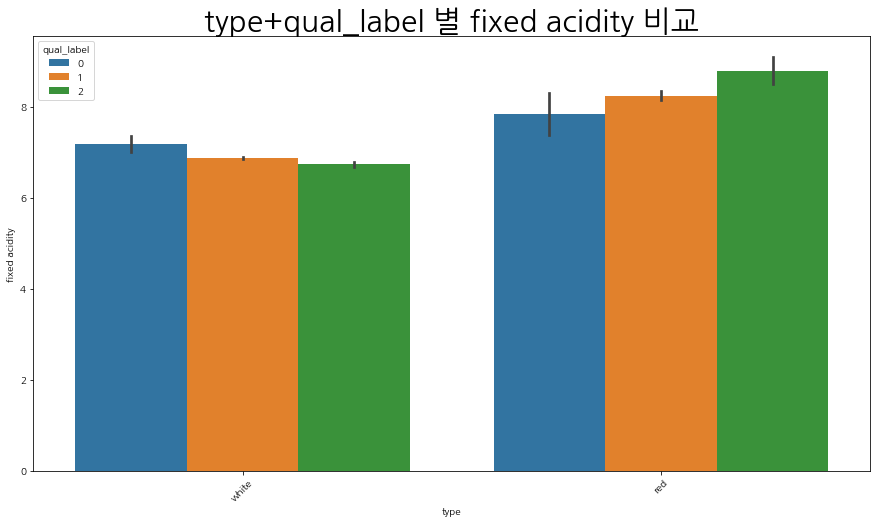

In [ ]:
type_and_qual_barplot('fixed acidity')

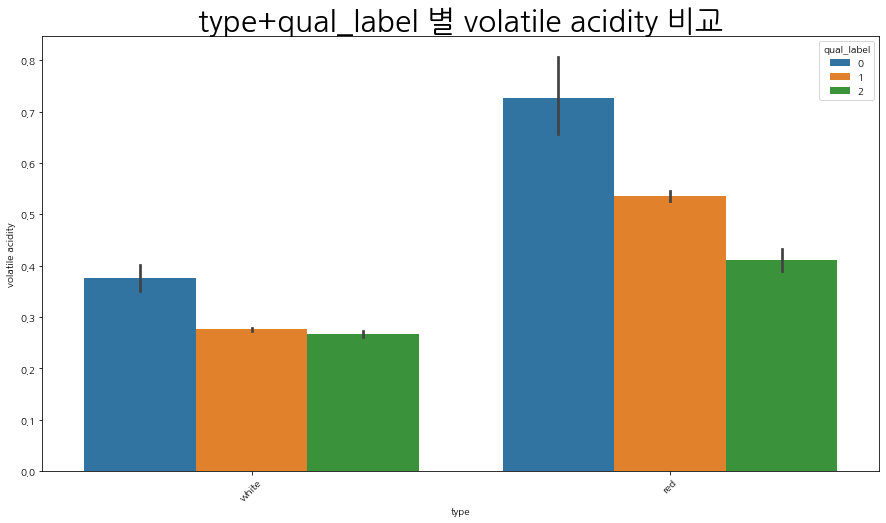

In [ ]:
type_and_qual_barplot('volatile acidity')

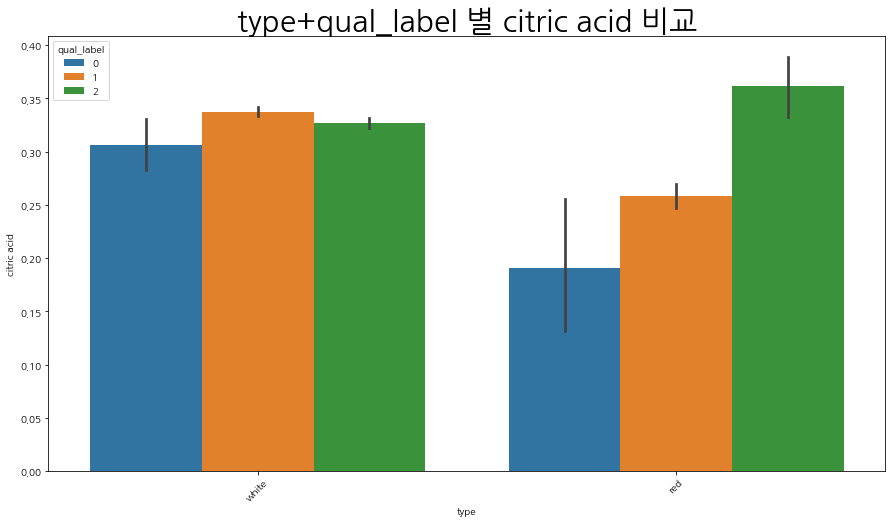

In [ ]:
type_and_qual_barplot('citric acid')

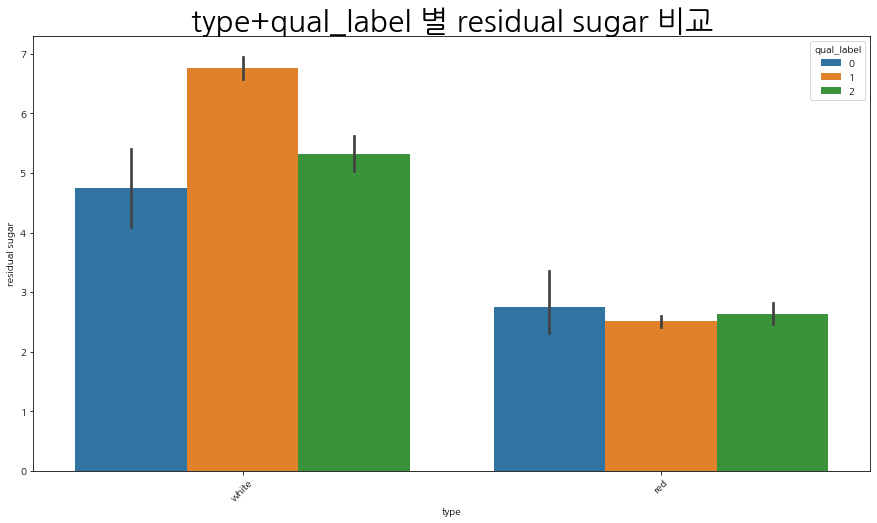

In [ ]:
type_and_qual_barplot('residual sugar')

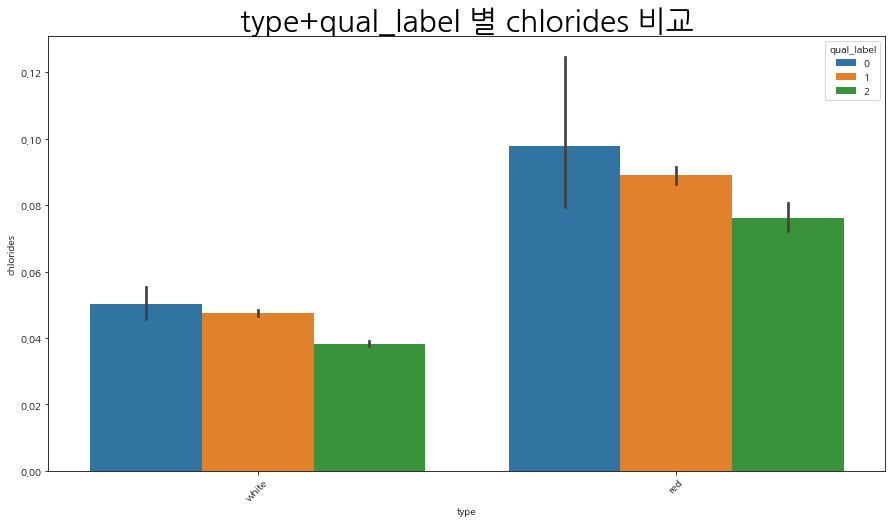

In [ ]:
type_and_qual_barplot('chlorides')

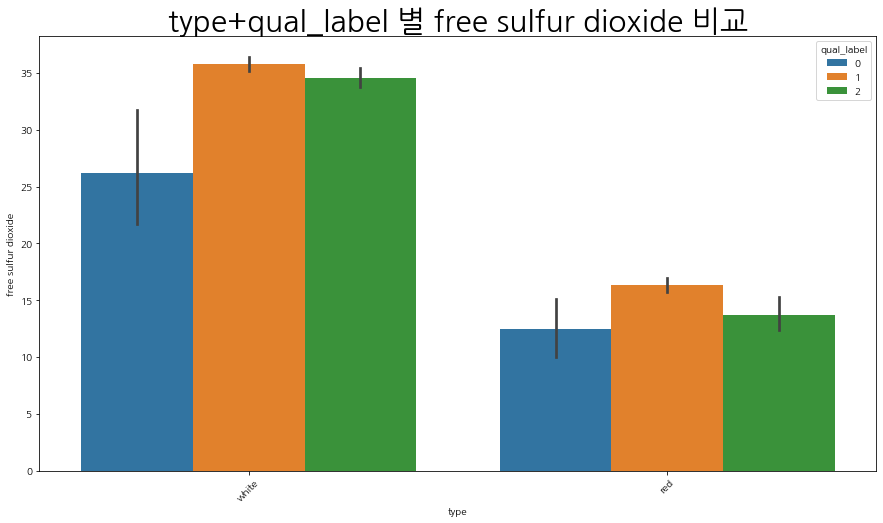

In [ ]:
type_and_qual_barplot('free sulfur dioxide')

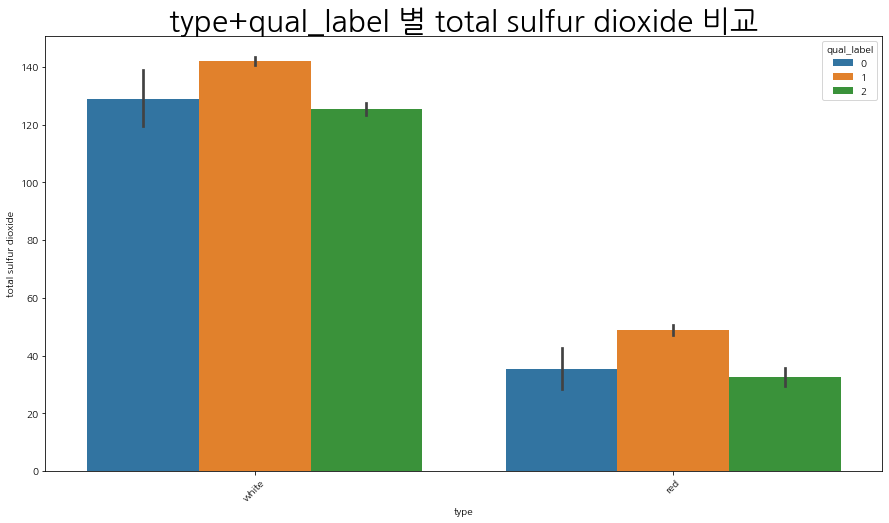

In [ ]:
type_and_qual_barplot('total sulfur dioxide')

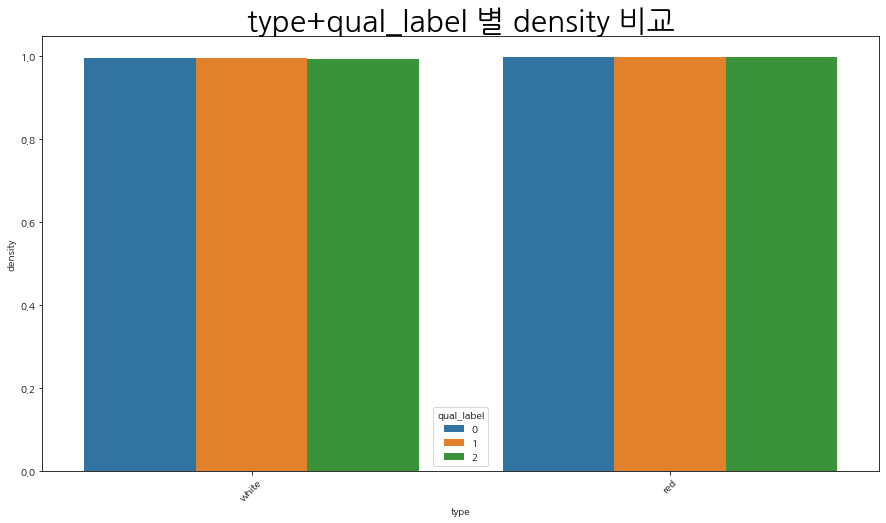

In [ ]:
type_and_qual_barplot('density')

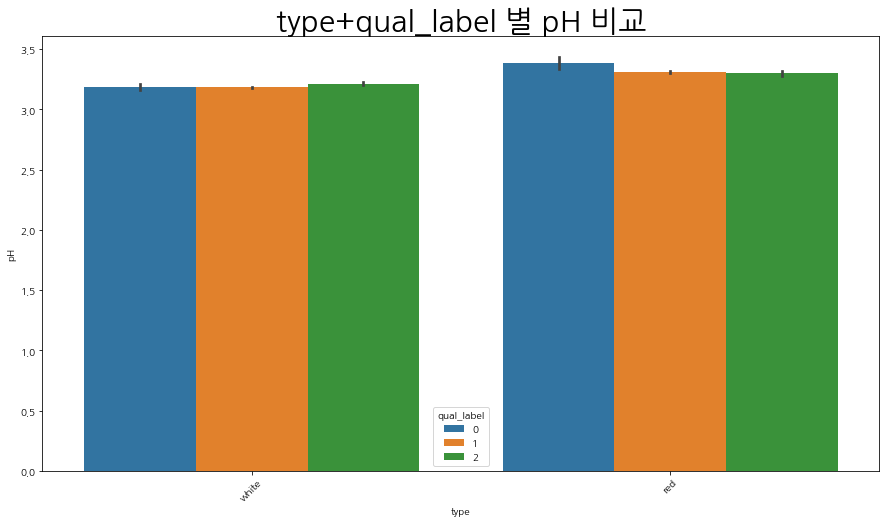

In [ ]:
type_and_qual_barplot('pH')

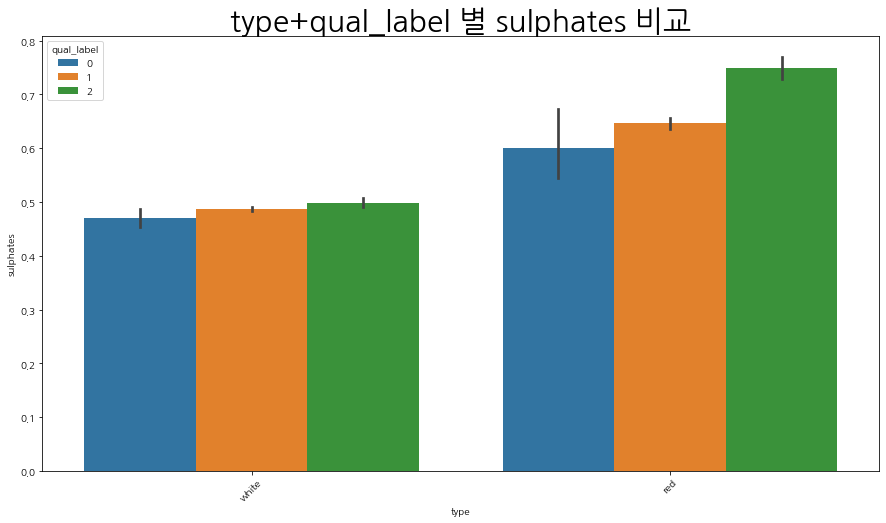

In [ ]:
type_and_qual_barplot('sulphates')

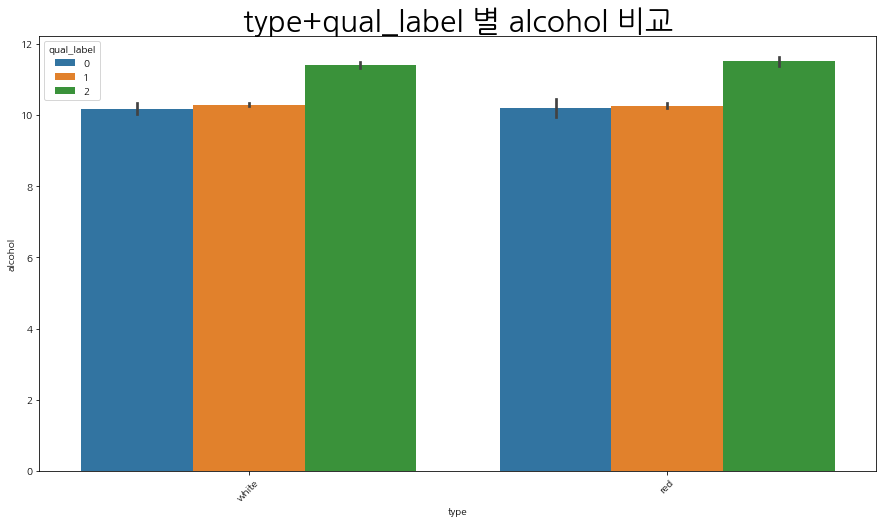

In [ ]:
type_and_qual_barplot('alcohol')

## EDA - Features

### describ 함수
: column의 describe 시각화  
  - Stage2.따릉이 대여량 예측 [1_따릉이_2.ipynb 코드공유](https://dacon.io/competitions/open/235939/codeshare/5518)  

In [ ]:
def describ(name):
  plt.figure(figsize=(6,4))
  plt.rcParams['font.size'] = 15
  data = train.describe().loc['min':'max', name]

  plt.title(name)
  plt.plot(data, color = 'red', marker = 'o')
  plt.grid(True)

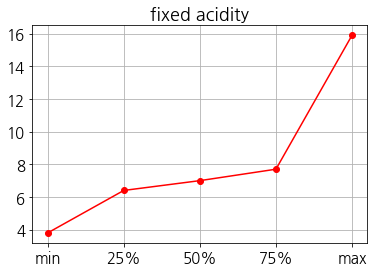

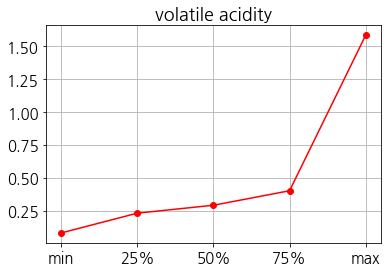

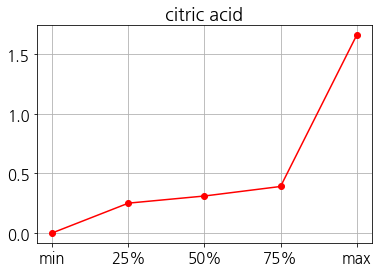

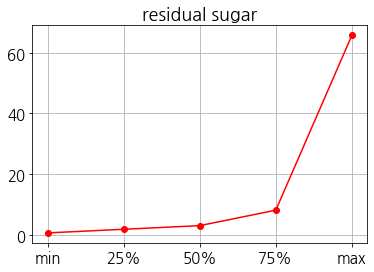

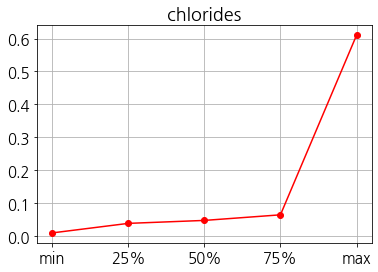

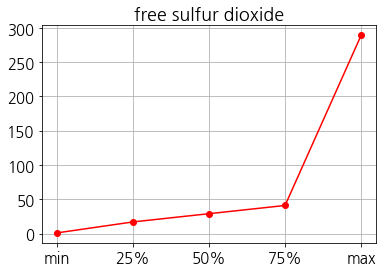

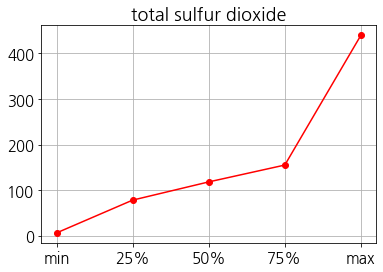

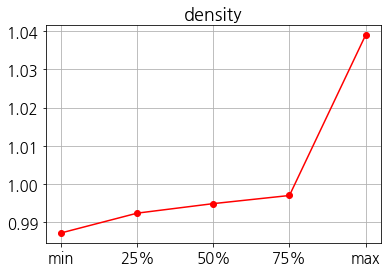

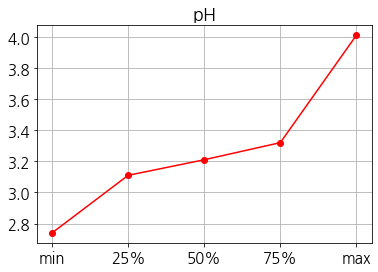

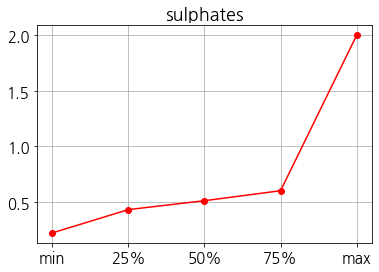

In [ ]:
for col in train.groupby('quality').mean().reset_index().columns[2:-2]:
  describ(col)

## MinMaxScaler with z-score 

### make_plots(text:str)
: features와 target의 상관관계를 파악하고자  
features의 column명(text)을 입력받아 target(quality)와의 상관관계를 bar그래프로 시각화함

In [ ]:
def make_plots(text:str):
  plt.title(text + ' vs quality')

  x = train.groupby('quality').mean().reset_index()['quality']
  y = train.groupby('quality').mean().reset_index()[text]

  plt.bar(x,y)
  plt.show()

#### 데이터 전처리 전

In [ ]:
# train 데이터셋 로드
train = pd.read_csv('./data/train.csv')
train['type'] = train['type'].map({"white":0, "red":1}).astype(int)

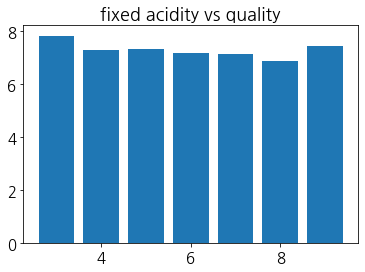

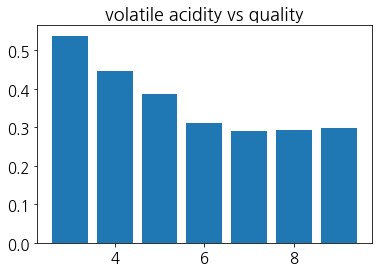

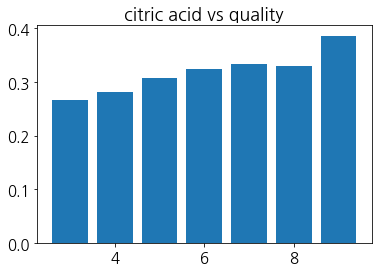

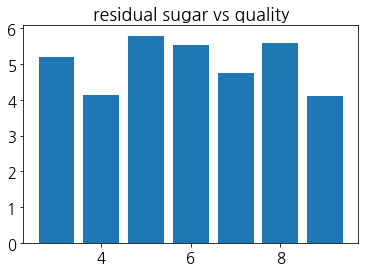

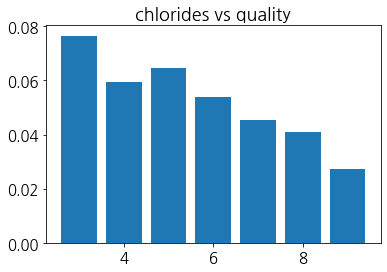

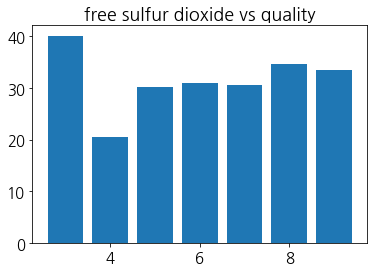

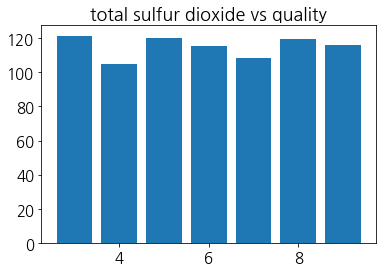

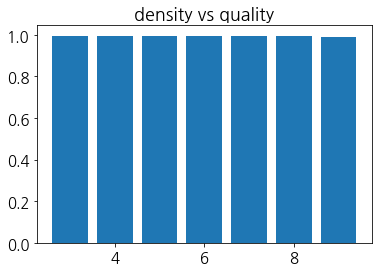

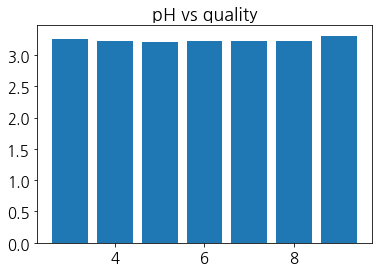

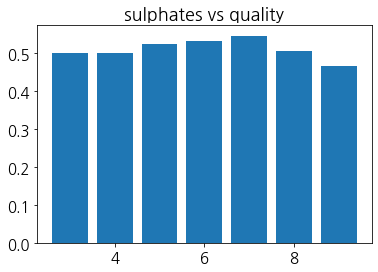

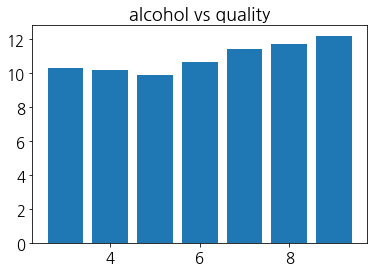

In [ ]:
for col in train.groupby('quality').mean().reset_index().columns[2:-1]:
  make_plots(col)

#### 데이터 전처리 후

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# train 데이터셋 로드
train = pd.read_csv('./data/train.csv')

# type 별 데이터셋 분할
white_wine = train[train['type']=="white"]
red_wine = train[train['type']=="red"]
white_temp = white_wine.shape
red_temp = red_wine.shape

# z-score가 3 이상 -3 이하인 행 제거
white_zscore = np.abs(stats.zscore(white_wine[white_wine.columns[2:-1]]))
white_wine = white_wine.loc[(white_zscore<3).all(axis=1)]
white_scaler = MinMaxScaler()

red_zscore = np.abs(stats.zscore(red_wine[red_wine.columns[2:-1]]))
red_wine = red_wine.loc[(red_zscore<3).all(axis=1)]
red_scaler = MinMaxScaler()

# MinMaxScaler 적용
white_wine[white_wine.columns[2:-1]] = white_scaler.fit_transform(white_wine[white_wine.columns[2:-1]])
red_wine[red_wine.columns[2:-1]] = red_scaler.fit_transform(red_wine[red_wine.columns[2:-1]])

# white_wine 과 red_wine을 병합한 train 데이터셋 생성
train = pd.concat([white_wine, red_wine])
train['type'] = train['type'].map({"white":0, "red":1}).astype(int)

# shape 변화 확인
print(f"white_wine : {white_temp}  -->  {white_wine.shape}")
print(f"red_wine : {red_temp}  ->  {red_wine.shape}")

white_wine : (4159, 14)  -->  (3814, 14)
red_wine : (1338, 14)  ->  (1213, 14)


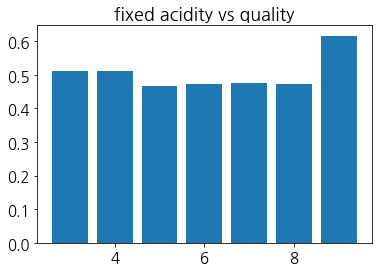

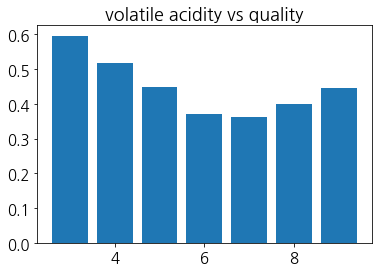

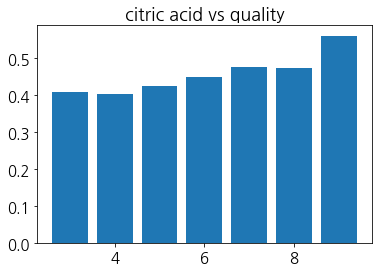

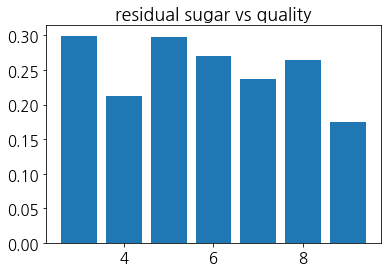

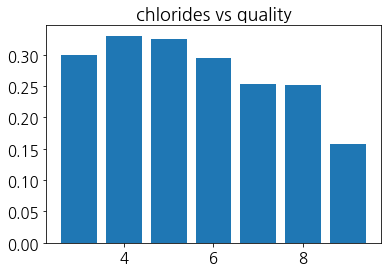

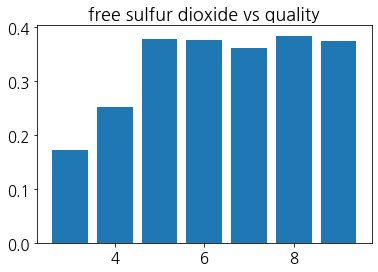

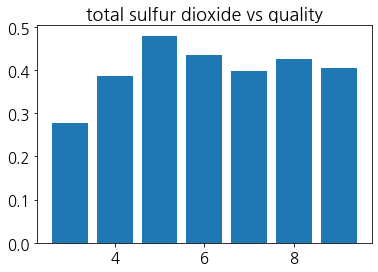

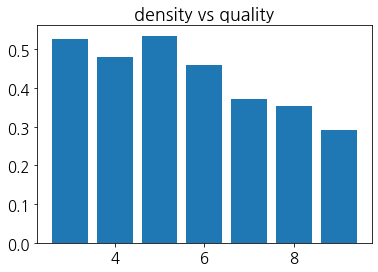

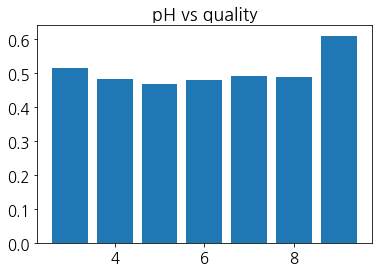

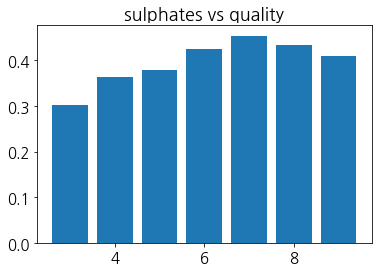

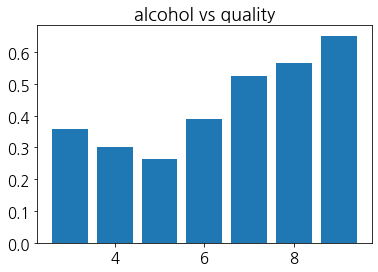

In [ ]:
for col in train.groupby('quality').mean().reset_index().columns[2:-1]:
  make_plots(col)

# 함수 zip

## 와인 품질 데이터
(최종 제출 파일에서 사용)

#### quality_barplot 함수  
: 데이터 전처리에 따른 데이터 개수 및 quality 분포 변화 시각화

In [ ]:
def quality_barplot(df:pd.DataFrame(), transformed=False):
  print(f'{set(df["type"])} 데이터 : {df.shape}')
  print(df['quality'].value_counts().sort_index())

  x = df['quality'].value_counts().sort_index().index
  y = df['quality'].value_counts().sort_index().values

  plt.figure(dpi=150)

  if not transformed:
    plt.title(f'{set(df["type"])} 와인 품질 분포 (original.ver)')
  else:
    plt.title(f'{set(df["type"])} 와인 품질 분포 (변경.ver)')

  plt.xlabel(f'{set(df["type"])} 와인 품질')
  plt.ylabel('개수')

  bar = plt.bar(x,y)

  # 숫자 넣는 부분
  max_h = 0
  for rect in bar:
      height = rect.get_height()
      plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)
      if max_h < height:
        max_h = height

  plt.ylim(0, max_h+150)
  plt.show()

### ACC
: 정확도(Accuracy) 함수

In [ ]:
def ACC(true, pred):
  score = np.mean(true == pred)
  return score

### make_plot
: 모델 검증 시각화 함수

In [ ]:
def make_plot():
  acc = ACC(y_valid, y_pred)

  validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})

  validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
  validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index().values
  validation_count = validation_count.fillna(0)

  x = validation_count.index
  y_valid_count = validation_count['y_valid']
  y_pred_count = validation_count['y_pred']

  width = 0.35

  plt.figure(dpi=150)

  plt.title('ACC : ' + str(acc)[:6])
  plt.xlabel('quality')
  plt.ylabel('count')

  p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
  p2 = plt.bar([idx+width/2 for idx in x], y_pred_count, width, label='pred')

  plt.legend()
  plt.show()

### confusion_matrix_plot
: 다중 분류 모델 성능 평가

- 다중 분류 모델 성능 평가  
[참고 블로그](https://blog.naver.com/PostView.nhn?blogId=fbfbf1&logNo=222455762411)

In [ ]:
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix, classification_report

def confusion_matrix_print():
  val_pred = model.predict(X_valid) # model prediction
  precision = precision_score(y_valid, val_pred, average= "macro")
  recall = recall_score(y_valid, val_pred,average= "macro")
  val_score = f1_score(y_valid, val_pred, average='macro')

  print(f'정밀도: [{precision:.4f}]')
  print(f'재현율: [{recall:.4f}]')
  print(f'F1 Score : [{val_score: .4f}]')
  
  print(classification_report(y_valid, val_pred))

  return val_pred

## EDA

### type_and_qual_barplot 함수

: type + qual_label 별 column(input) 비교

type
- white
- red

qual_label
- 0 (bad) - quality 3,4
- 1 (soso) - quality 5,6
- 2 (good) - quality 7,8,9

In [ ]:
def type_and_qual_barplot(col:str):
  plt.figure(figsize=(15,8))
  sns.barplot(x=train['type'], y=train[col], hue=train['qual_label'])
  plt.xticks(rotation=45)
  plt.title(f'type+qual_label 별 {col} 비교', fontsize=30)
  plt.show()

### describ 함수
: column의 describe 시각화

In [ ]:
def describ(name):
  plt.figure(figsize=(6,4))
  plt.rcParams['font.size'] = 15
  data = train.describe().loc['min':'max', name]

  plt.title(name)
  plt.plot(data, color = 'red', marker = 'o')
  plt.grid(True)

### make_plots(text:str)
: features와 target의 상관관계를 파악하고자  
features의 column명(text)을 입력받아 target(quality)와의 상관관계를 bar그래프로 시각화함

In [ ]:
def make_plots(text:str):
  plt.title(text + ' vs quality')

  x = train.groupby('quality').mean().reset_index()['quality']
  y = train.groupby('quality').mean().reset_index()[text]

  plt.bar(x,y)
  plt.show()